In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotter(filename, n, t, printB=False, savefig=False):
    
    datafile = np.loadtxt(filename+'.csv', delimiter=',')
    theta, B = datafile.T[3][0:t], datafile.T[6]*1000

    if n > 1:
        fig, ax = plt.subplots(n, sharex=True, sharey=True, figsize=(16,16))
        for i in range(0, n):
            B_ = B[i*t:i*t+t]
            ax[i].plot(theta, B_-np.mean(B_),label=('r = {}mm').format(i))
            ax[i].legend(loc='lower left')
        ax[-1].set_xlabel('Theta, θ (deg)', fontsize=16)
        ax[n//2].set_ylabel('B - B$_{mean}$ (mT)', fontsize=18)
    elif n == 1:
        fig, ax = plt.subplots(n, sharex=True, sharey=True)
        ax.plot(theta, B - np.mean(B), label=('r = 0mm'))
        ax.set_xlabel('Theta, θ (deg)', fontsize=12)
        ax.set_ylabel('B - B$_{mean}$ (mT)', fontsize=12)
    
    if printB == True:
        print('The average B-field magnitudes for each radius are:')
        for i in range(0, n):
            B_ = B[i*t:i*t+t]
            print('r = {}mm: {:.3f}mT'.format(i, np.mean(B_)))
    if savefig == True:
        plt.savefig(filename + ' Plots', dpi=900)

The average B-field magnitudes for each radius are:
r = 0mm: -1350.219mT
r = 1mm: -1351.983mT
r = 2mm: -1356.890mT
r = 3mm: -1365.153mT
r = 4mm: -1377.246mT
r = 5mm: -1393.652mT
r = 6mm: -1414.478mT
r = 7mm: -1439.611mT
r = 8mm: -1466.578mT
r = 9mm: -1494.380mT
r = 10mm: -1519.204mT
r = 11mm: -1539.415mT
r = 12mm: -1554.832mT
r = 13mm: -1565.912mT
r = 14mm: -1574.015mT


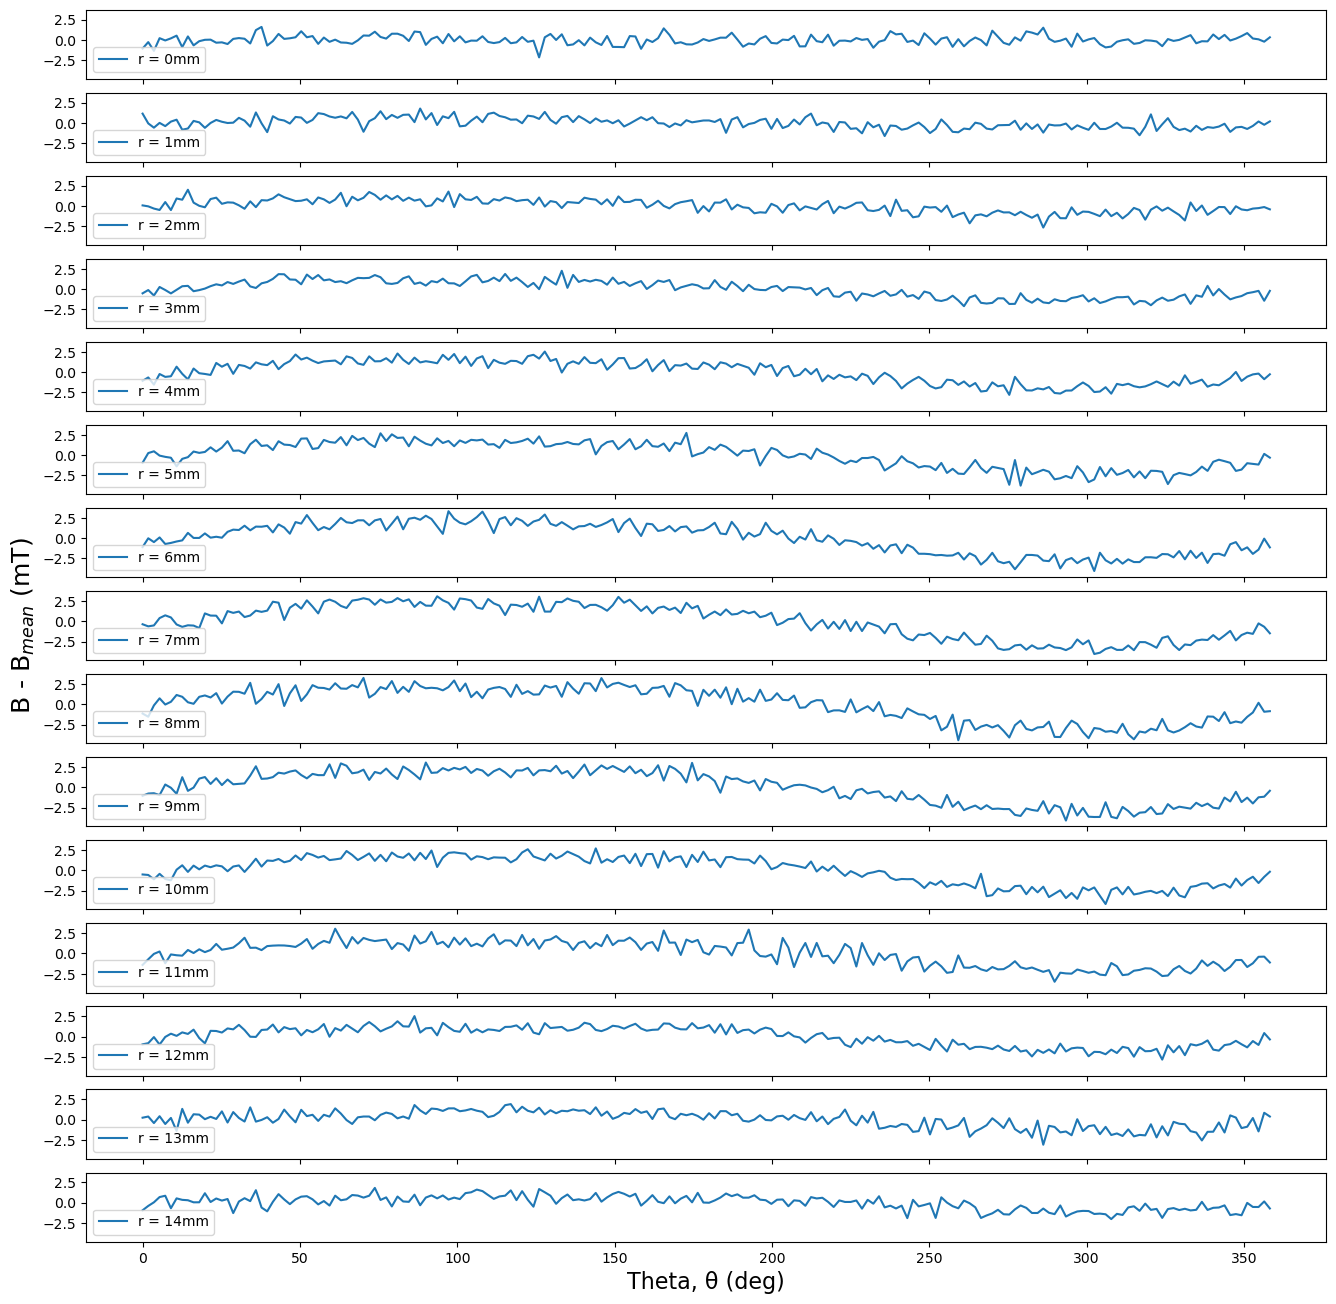

In [3]:
plotter('20221208_PM1_1,8', 15, 200, printB=True, savefig=True)

(0.0, 10.0)

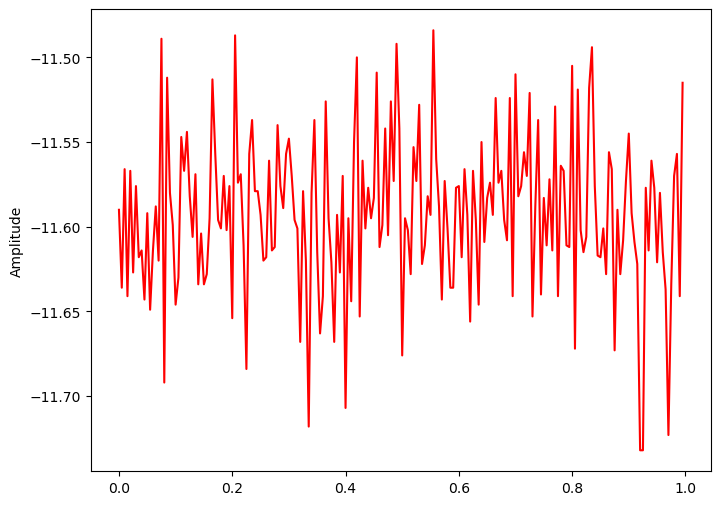

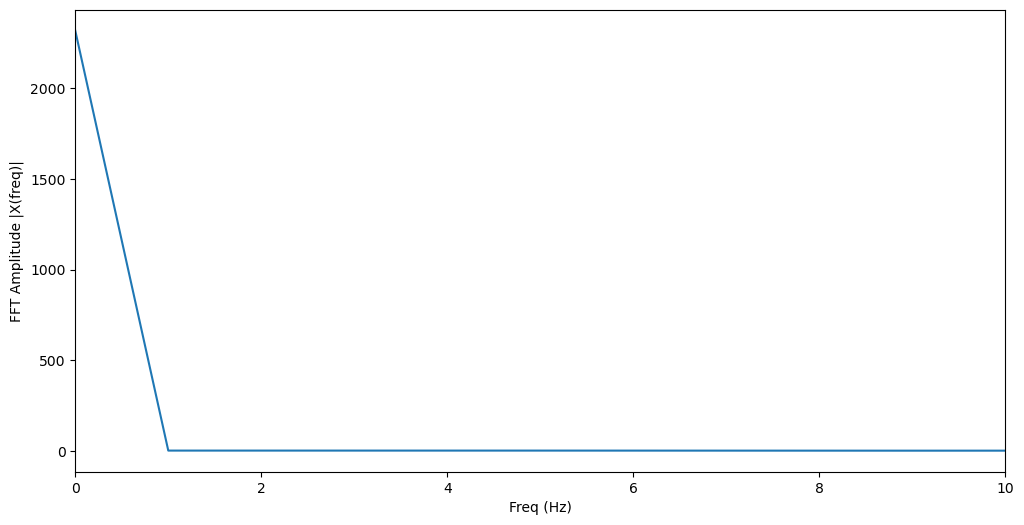

In [13]:
datafile = np.loadtxt('20221130_PM8_20.csv', delimiter=',')
B = datafile.T[6]*1000

# sampling rate
sr = 200
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

plt.figure(figsize = (8, 6))
plt.plot(t, B[0:200], 'r')
plt.ylabel('Amplitude')

X = np.fft.fft(B[0:200])
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 
plt.figure(figsize = (12, 6))
plt.plot(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

In [187]:
ftrans = np.fft.fft(B[0:200])
freqs = np.fft.fftfreq(len(B[0:200]))
f = []
for coef, freq in zip(ftrans, freqs):
    if coef:
        f.append('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,
                                                    f=freq))
f = np.array(f)
f

array(['(-2318.505+0j) * exp(2 pi i t * 0.0)',
       '(-0.7144044510837331+0.2897687332079272j) * exp(2 pi i t * 0.005)',
       '(-0.5866479790964335-0.6594240020418536j) * exp(2 pi i t * 0.01)',
       '(-0.8321821882778131-0.3691349929210906j) * exp(2 pi i t * 0.015)',
       '(0.6944463933150703+0.09536711396756065j) * exp(2 pi i t * 0.02)',
       '(-0.3670415928342999-0.6265915861780821j) * exp(2 pi i t * 0.025)',
       '(0.47895994657744945+0.150817596498597j) * exp(2 pi i t * 0.03)',
       '(0.5105306739682759+0.2869877801307815j) * exp(2 pi i t * 0.035)',
       '(-0.3225066942487479+0.19497031344152632j) * exp(2 pi i t * 0.04)',
       '(0.29881056008158247+0.10940811639350939j) * exp(2 pi i t * 0.045)',
       '(0.2551020763604607+0.2331069021664961j) * exp(2 pi i t * 0.05)',
       '(0.5935714284606377-0.2882602589904148j) * exp(2 pi i t * 0.055)',
       '(-0.17797595958081514-0.0065518035645015515j) * exp(2 pi i t * 0.06)',
       '(0.06851709387015276-0.01094942468140